In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.layers import Input, Dense, GRU, LSTM
from keras.models import Model
from keras import losses
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

#Define Load embed
def load_embed(ind):
    doc_embed   = tf.constant(np.load(f"embeds/doc_embed_{ind}.npy"))
    word_embed  = tf.constant(np.load(f"embeds/word_embed_{ind}.npy"))
    topic_embed = tf.constant(np.load(f"embeds/topic_embed_{ind}.npy"))
    return (doc_embed, word_embed, topic_embed)

#Define Topic Dist
def topic_dist(ind):
    embeds = load_embed(ind)
    doc_embed = embeds[0]
    topic_embed = embeds[2]
    norm_doc = tf.nn.softmax(doc_embed)
    topic_dist = tf.linalg.matmul(norm_doc, topic_embed)
    return topic_dist

Using TensorFlow backend.


In [2]:
#Load Data
data = topic_dist(0)
print(data.shape)
#Input is a year integer
inputs = np.array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
inputs = np.expand_dims(inputs,axis=1)
inputs = np.expand_dims(inputs,axis=1)
print(inputs.shape)
#Intend to output a document vector by year
outputs = data[0::10]
print(outputs.shape)

(100, 300)
(10, 1, 1)
(10, 300)


Epoch 1/100
10/10 [==============================] - 2s 189ms/step - loss: -0.2538 - acc: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 15ms/step - loss: -0.4110 - acc: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 15ms/step - loss: -0.4222 - acc: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 16ms/step - loss: -0.4267 - acc: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 16ms/step - loss: -0.4300 - acc: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 16ms/step - loss: -0.4326 - acc: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 16ms/step - loss: -0.4343 - acc: 0.0000e+00
Epoch 8/100
10/10 [==============================] - 0s 16ms/step - loss: -0.4357 - acc: 0.0000e+00
Epoch 9/100
10/10 [==============================] - 0s 18ms/step - loss: -0.4369 - acc: 0.0000e+00
Epoch 10/100
10/10 [==============================] - 0s 18ms/step - loss: -0.4378 - acc: 0.0000e+0

10/10 [==============================] - 0s 20ms/step - loss: -0.4448 - acc: 0.0000e+00
Epoch 83/100
10/10 [==============================] - 0s 16ms/step - loss: -0.4448 - acc: 0.0000e+00
Epoch 84/100
10/10 [==============================] - 0s 16ms/step - loss: -0.4448 - acc: 0.0000e+00
Epoch 85/100
10/10 [==============================] - 0s 14ms/step - loss: -0.4448 - acc: 0.0000e+00
Epoch 86/100
10/10 [==============================] - 0s 17ms/step - loss: -0.4449 - acc: 0.0000e+00
Epoch 87/100
10/10 [==============================] - 0s 14ms/step - loss: -0.4449 - acc: 0.0000e+00
Epoch 88/100
10/10 [==============================] - 0s 14ms/step - loss: -0.4449 - acc: 0.0000e+00
Epoch 89/100
10/10 [==============================] - 0s 15ms/step - loss: -0.4449 - acc: 0.0000e+00
Epoch 90/100
10/10 [==============================] - 0s 18ms/step - loss: -0.4449 - acc: 0.0000e+00
Epoch 91/100
10/10 [==============================] - 0s 16ms/step - loss: -0.4449 - acc: 0.0000e+00
Epo

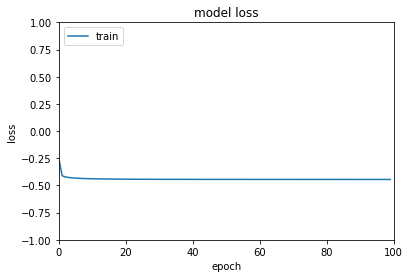

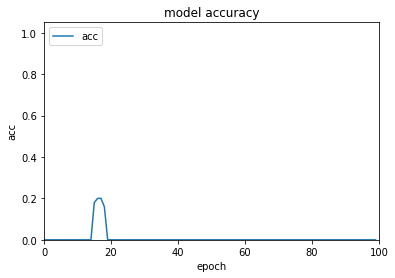

In [3]:
input_size = 1
rnn_size1 = 300
output_size = 300

input_data = Input(shape=(1,input_size,))
hidden_rnn_1 = GRU(rnn_size1, activation='tanh', return_sequences=True)(input_data)
predicted = Dense(output_size, activation='tanh')(hidden_rnn_1)

predictor = Model(input_data, predicted)
predictor.compile(optimizer='Adam', loss='cosine_similarity', metrics=['acc'] ) #Can also do MSE or MAE here for loss.

p = predictor.fit(inputs, outputs,
epochs=100,
steps_per_epoch=10,
shuffle=False)
#validation_data=(X_test, Y_test))

#Plotting loss
plt.plot(p.history['loss'])
#plt.plot(p.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
#plt.legend(['train', 'validation'], loc='upper left')
plt.axis([0, 100, -1, 1])
plt.show()

#Plotting Accuracy
plt.plot(p.history['acc'])
#plt.plot(p.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc'], loc='upper left')
#plt.legend(['acc', 'val_acc'], loc='upper left')
plt.axis([0, 100, 0.0, 1.05])
plt.show()